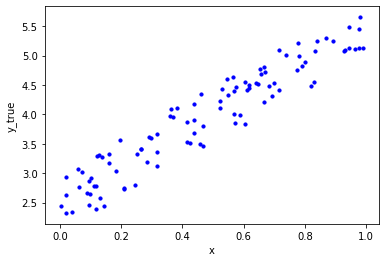

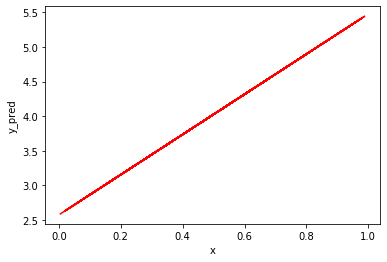

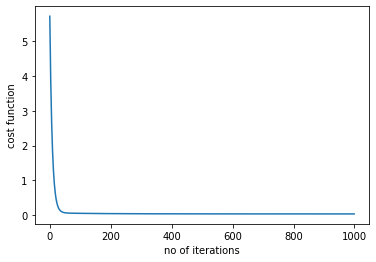

The coefficient is [2.90604515]
The intercept is [2.57353963]
Root mean squared error of the model is 2.762456708701322.
R-squared score is 0.9037666586924584.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# y_pred = x0 * 1 + x1 * w1 + x2 * w2 + ... + xn * wn              [n+1 features including bias]
# Inputs : (X), (y)  [each such X has n features-(x1,x2,..xn)]     [m such data points in total]

def get_data():
    '''
    np.random.seed(0)
    x = np.random.rand(100, 1)
    y = 2 + 3 * x + np.random.rand(100, 1)
    return x, y
    '''
    dataset = np.genfromtxt("data/linreg.csv", delimiter=",")
    data = dataset[:, [0, 1]]
    training_data = data[1:75, :]
    test_data = data[75:85, :]
    X_train, y_train = training_data[:, 0], training_data[:, 1]
    return X_train, y_train
    
class LinReg():

    def __init__(self, x, y, lr=0.05, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = np.random.rand(x.shape[1], 1)
        self.all_losses = []
        self.m = x.shape[0]
        self.x = x
        self.y = y

    def fit(self):
        '''
        x.shape -> [num_samples, num_features]
        y.shape -> [num_samples, num_target_vals]
        '''
        # training loop
        for _ in range(self.epochs):
            y_pred = np.dot(self.x, self.w)
            residuals = y_pred - self.y
            gradient_vector = np.dot(self.x.T, residuals)
            self.w -= (self.lr / self.m) * gradient_vector
            epoch_loss = np.sum((residuals ** 2)) / (2 * m)
            self.all_losses.append(epoch_loss)
        return self

    def predict(self):
        return np.dot(self.x, self.w)

    @classmethod
    def set_labels(cls, x_label, y_label):
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()

    def scatter_plot(self, x, y, size=10, x_label='x', y_label='y_true', color='b'):
        plt.scatter(x, y, s=size, color=color)
        LinReg.set_labels(x_label, y_label)

    def plot_regression_line(self, x, y, x_label='x', y_label='y_pred', color='r'):
        plt.plot(x, y, color=color)
        LinReg.set_labels(x_label, y_label)

    def plot_loss_curve(self, y, x_label='x', y_label='y'):
        plt.plot(y)
        LinReg.set_labels(x_label, y_label)

    @classmethod
    def sum_of_square_of_residuals(cls, y, predicted_values):
        return np.sum((y - predicted_values) ** 2)

    def compute_rmse(self, y, predicted_values):
        return np.sqrt(LinReg.sum_of_square_of_residuals(y, predicted_values))

    def compute_r2_score(self, y, predicted_values):
        # sum of square of residuals
        ssr = LinReg.sum_of_square_of_residuals(y, predicted_values)

        # total sum of errors
        sst = np.sum((y - np.mean(y)) ** 2)

        return 1 - (ssr / sst)



# generate the data set
x, y = get_data()

# transform the feature vectors to include the bias term
# by adding a column of 1's to all the instances of the training set.
m = x.shape[0]
x_train = np.c_[np.ones((m, 1)), x]

# initializing the model
model = LinReg(x_train, y)

# train the model
model.fit()

# predict values
predicted_values = model.predict()

# model parameters
intercept, coeffs = model.w

# loss across epochs
cost_function = model.all_losses

# plot graphs
model.scatter_plot( x, y)
model.plot_regression_line(x, predicted_values)
model.plot_loss_curve(cost_function, 'no of iterations', 'cost function')

# computing metrics
rmse = model.compute_rmse( y, predicted_values)
r2_score = model.compute_r2_score(y, predicted_values)
print('The coefficient is {}'.format(coeffs))
print('The intercept is {}'.format(intercept))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2_score))

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['class'] = iris.target
X = pd.DataFrame(np.c_[data['petal width (cm)'], data['sepal length (cm)']], columns = ['petal width (cm)','sepal length (cm)'])
Y = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [3]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [ ]:
m = x.shape[0]
x_train = np.c_[np.ones((m, 1)), x]
print(x_train.shape)

In [ ]:
w = np.random.rand(x_train.shape[1], 1)
print(w.shape)

In [ ]:
y_pred = np.dot(x_train, w) # Σ (xi . wi) = h(x)
print(y_pred.shape)

In [ ]:
residuals = y_pred - y # h(x) - y
print(residuals.shape)

In [ ]:
# xT * (h(x) - y) = ( vector of partial derivatives of all parameters at once ) * m
gradient_vector = np.dot(x_train.T, residuals) 
print(gradient_vector.shape)

In [ ]:
lr = 0.05
w -= (lr / m) * gradient_vector  # w_new = w_old - lr * (xT * (h(x) - y))/m
print(w.shape)